In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Categorical Features
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- income_type: 소득 분류 ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준 ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부 ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식 ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형



Numeric Features
- child_num
- DAYS_BIRTH: 출생일. 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일. 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미, 양수 값은 고용되지 않은 상태를 의미함
- family_size: 가족 규모
- begin_month: 신용카드 발급 월. 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미



Target
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [7]:
df = pd.read_csv('./data/train.csv')
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [8]:
df[df.occyp_type.isna()].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,8171.000000,8171.000000,8171.000000,8171.000000,8171.000000,8171.0,8171.000000,8171.000000,8171.000000,8171.000000,8171.000000,8171.000000
mean,13229.342431,0.245502,169174.356444,-18602.216130,197107.934402,1.0,0.118468,0.299474,0.064619,1.982989,-26.328846,1.526129
std,7642.204184,0.584324,94186.305218,4453.474769,183344.362600,0.0,0.323181,0.458056,0.245867,0.782820,16.649418,0.697185
min,0.000000,0.000000,29250.000000,-25152.000000,-15072.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6622.000000,0.000000,112500.000000,-22145.000000,-1962.000000,1.0,0.000000,0.000000,0.000000,2.000000,-40.000000,1.000000
50%,13202.000000,0.000000,144000.000000,-20267.000000,365243.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000,2.000000
75%,19806.500000,0.000000,202500.000000,-14897.000000,365243.000000,1.0,0.000000,1.000000,0.000000,2.000000,-12.000000,2.000000
max,26453.000000,5.000000,900000.000000,-8097.000000,365243.000000,1.0,1.000000,1.000000,1.000000,6.000000,0.000000,2.000000


In [9]:
list(set(df.occyp_type))

[nan,
 'HR staff',
 'Waiters/barmen staff',
 'Medicine staff',
 'Realty agents',
 'Private service staff',
 'IT staff',
 'Cleaning staff',
 'Accountants',
 'Security staff',
 'Laborers',
 'Secretaries',
 'Low-skill Laborers',
 'Sales staff',
 'Drivers',
 'Managers',
 'Cooking staff',
 'High skill tech staff',
 'Core staff']

In [10]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [7]:
df[df.DAYS_EMPLOYED > 0].DAYS_EMPLOYED.value_counts()

365243    4438
Name: DAYS_EMPLOYED, dtype: int64

In [8]:
df[df.DAYS_EMPLOYED > 0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
21,21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,1,0,1,0,NaN,2.0,-7.0,2.0
24,24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,1,0,1,0,NaN,1.0,-5.0,2.0
46,46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,1,0,1,0,NaN,1.0,-24.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,1,0,0,1,NaN,1.0,-60.0,1.0
26432,26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,1,0,1,0,NaN,2.0,-17.0,1.0
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0


In [11]:
df.gender = df.gender.replace({'F' : 0, 'M' : 1})
df.car = df.car.replace({'N' : 0, 'Y' : 1})
df.reality = df.reality.replace({'N' : 0, 'Y' : 1})

df['age'] = df.DAYS_BIRTH.apply(lambda x : -x // 365)
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.apply(lambda x : -x)
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x : -x)
df.begin_month = df.begin_month.apply(lambda x : -x)

In [12]:
df.head(1)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,4709,1,0,0,0,NaN,2.0,6.0,1.0,38


<AxesSubplot:>

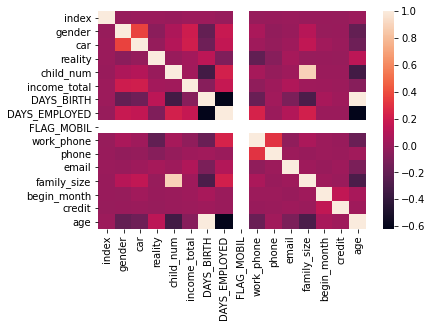

In [13]:
sns.heatmap(df.corr())

In [14]:
df.FLAG_MOBIL.value_counts()

1    26457
Name: FLAG_MOBIL, dtype: int64

<AxesSubplot:xlabel='credit', ylabel='count'>

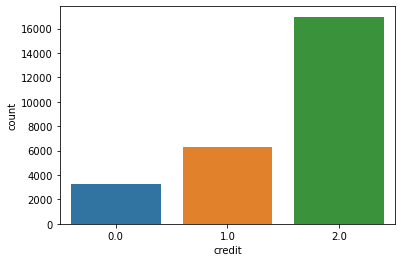

In [15]:
sns.countplot(x = 'credit', data = df)

credit: 1.0
0    0.673368
1    0.326632
Name: gender, dtype: float64

credit: 2.0
0    0.667669
1    0.332331
Name: gender, dtype: float64

credit: 0.0
0    0.666667
1    0.333333
Name: gender, dtype: float64



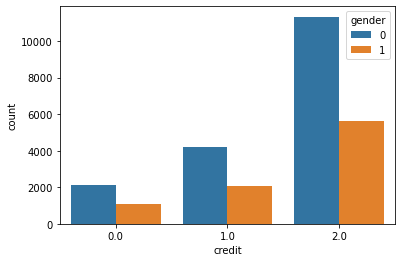

In [38]:
sns.countplot(x = 'credit', hue = 'gender', data=df)
for i in df.credit.unique():
    a = df[df.credit == i]
    print('credit:', i)
    print(a.gender.value_counts()/len(a))
    print()

credit: 1.0
0    0.636668
1    0.363332
Name: car, dtype: float64

credit: 2.0
0    0.615158
1    0.384842
Name: car, dtype: float64

credit: 0.0
0    0.615146
1    0.384854
Name: car, dtype: float64



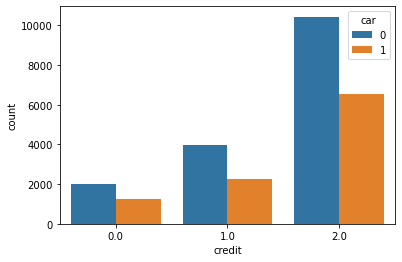

In [39]:
sns.countplot(x = 'credit', hue = 'car', data=df)
for i in df.credit.unique():
    a = df[df.credit == i]
    print('credit:', i)
    print(a.car.value_counts()/len(a))
    print()

credit: 1.0
1    0.69124
0    0.30876
Name: reality, dtype: float64

credit: 2.0
1    0.668317
0    0.331683
Name: reality, dtype: float64

credit: 0.0
1    0.66977
0    0.33023
Name: reality, dtype: float64



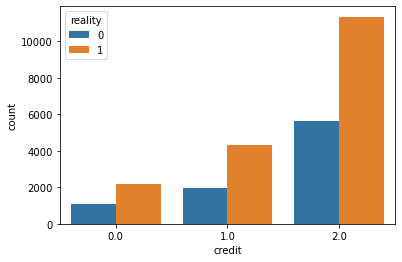

In [41]:
sns.countplot(x = 'credit', hue = 'reality', data=df)
for i in df.credit.unique():
    a = df[df.credit == i]
    print('credit:', i)
    print(a.reality.value_counts()/len(a))
    print()

credit: 1.0
Secondary / secondary special    0.670815
Higher education                 0.279400
Incomplete higher                0.039253
Lower secondary                  0.009414
Academic degree                  0.001117
Name: edu_type, dtype: float64

credit: 2.0
Secondary / secondary special    0.684936
Higher education                 0.265323
Incomplete higher                0.038897
Lower secondary                  0.010019
Academic degree                  0.000825
Name: edu_type, dtype: float64

credit: 0.0
Secondary / secondary special    0.673184
Higher education                 0.282123
Incomplete higher                0.035382
Lower secondary                  0.008690
Academic degree                  0.000621
Name: edu_type, dtype: float64



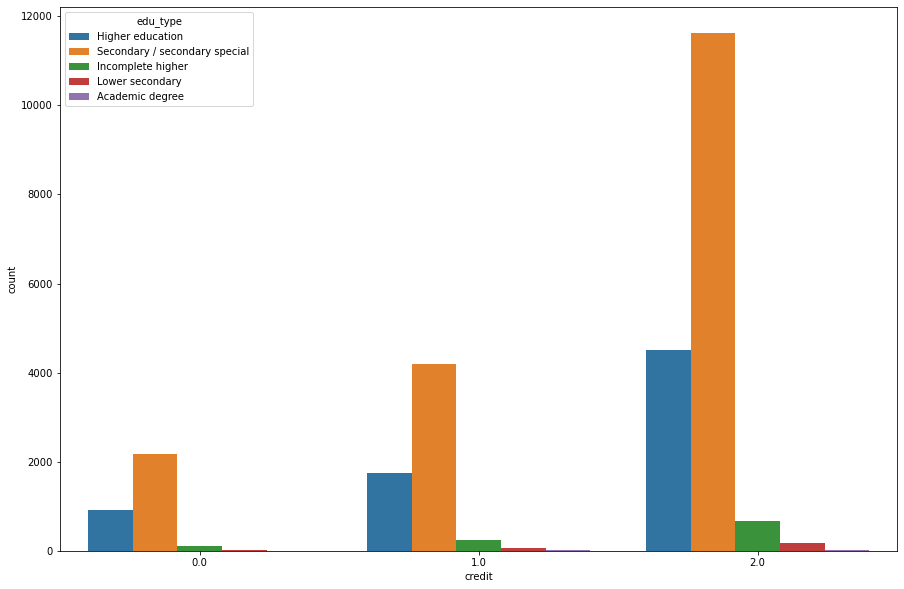

In [40]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'credit', hue = 'edu_type', data=df)
for i in df.credit.unique():
    a = df[df.credit == i]
    print('credit:', i)
    print(a.edu_type.value_counts()/len(a))
    print()

credit: 1.0
House / apartment      0.888623
With parents           0.049944
Municipal apartment    0.025531
Rented apartment       0.023456
Office apartment       0.007659
Co-op apartment        0.004787
Name: house_type, dtype: float64

credit: 2.0
House / apartment      0.896452
With parents           0.046735
Municipal apartment    0.032296
Rented apartment       0.013673
Office apartment       0.006954
Co-op apartment        0.003890
Name: house_type, dtype: float64

credit: 0.0
House / apartment      0.891682
With parents           0.046865
Municipal apartment    0.034140
Rented apartment       0.015518
Office apartment       0.007449
Co-op apartment        0.004345
Name: house_type, dtype: float64



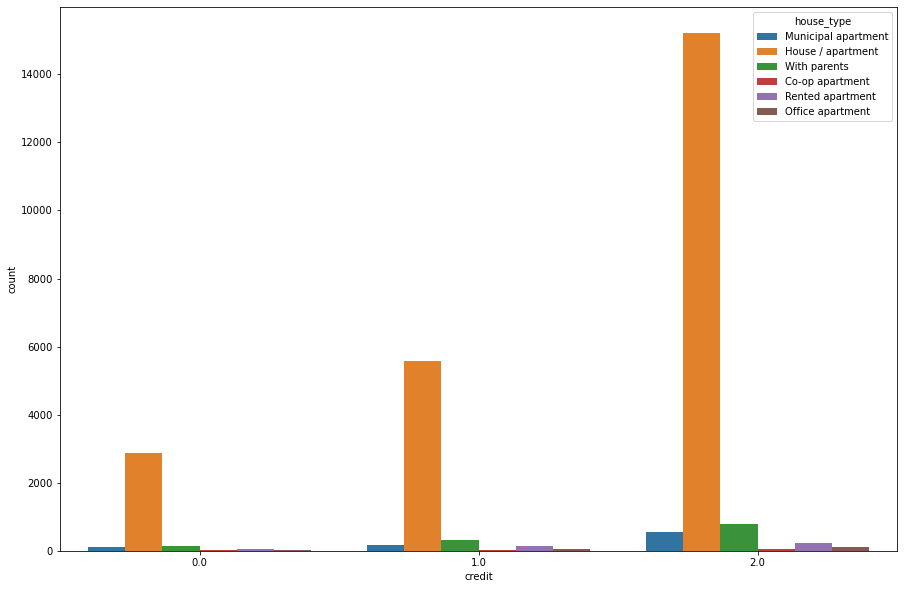

In [42]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'credit', hue = 'house_type', data=df)
for i in df.credit.unique():
    a = df[df.credit == i]
    print('credit:', i)
    print(a.house_type.value_counts()/len(a))
    print()

credit: 1.0
Laborers                 0.172650
Sales staff              0.103718
Core staff               0.099250
Managers                 0.073081
Drivers                  0.057125
High skill tech staff    0.043083
Accountants              0.036221
Medicine staff           0.030477
Cooking staff            0.017552
Cleaning staff           0.014840
Security staff           0.014042
Private service staff    0.008776
Waiters/barmen staff     0.007978
Secretaries              0.004947
Low-skill Laborers       0.003351
IT staff                 0.001596
Realty agents            0.001436
HR staff                 0.000638
Name: occyp_type, dtype: float64

credit: 2.0
Laborers                 0.167610
Core staff               0.098833
Sales staff              0.094059
Managers                 0.084217
Drivers                  0.060702
High skill tech staff    0.038131
Medicine staff           0.034771
Accountants              0.032826
Security staff           0.017504
Cooking staff           

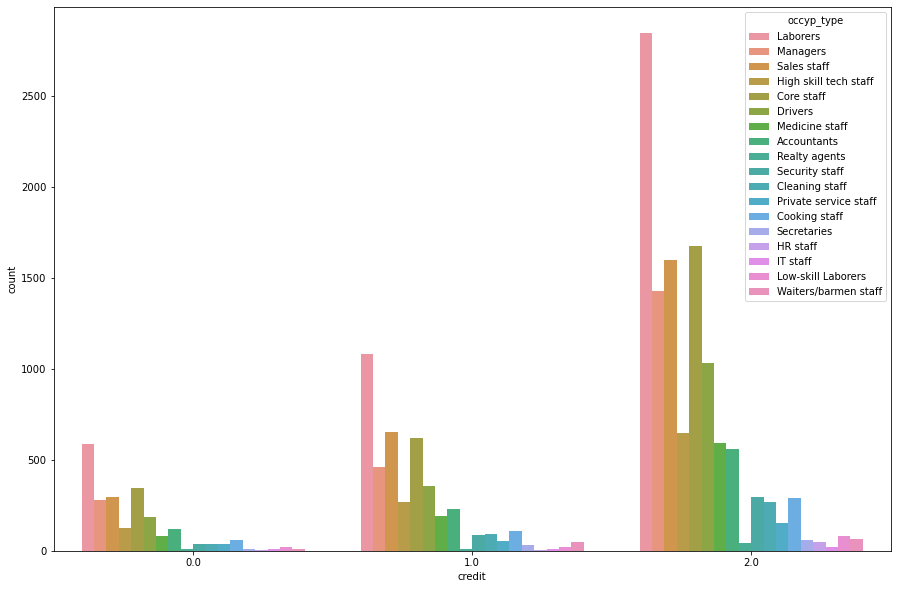

In [43]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'credit', hue = 'occyp_type', data=df)
for i in df.credit.unique():
    a = df[df.credit == i]
    print('credit:', i)
    print(a.occyp_type.value_counts()/len(a))
    print()

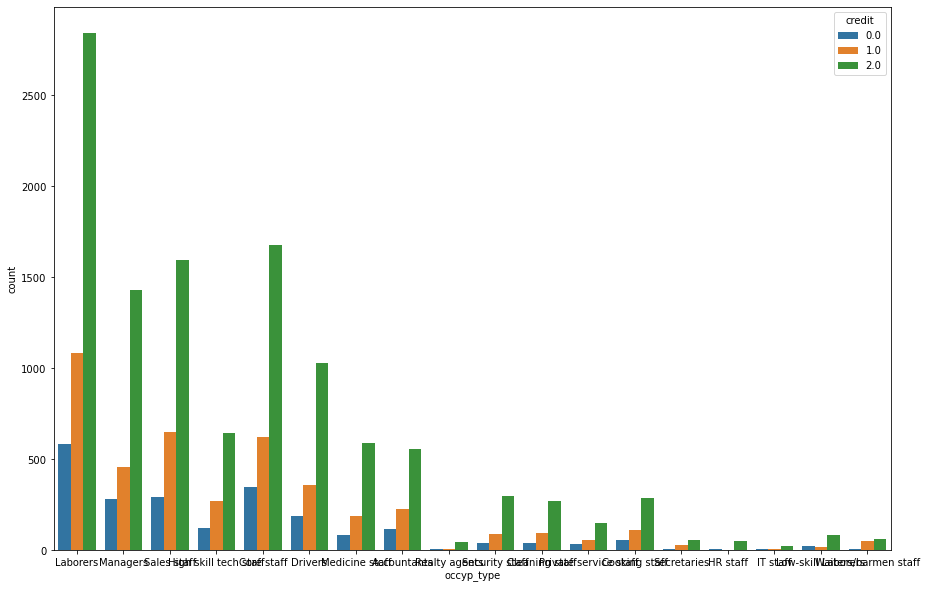

In [26]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'occyp_type', hue = 'credit', data=df)
plt.show()

In [44]:
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,...,4709,1,0,0,0,NaN,2.0,6.0,1.0,38
1,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,...,1540,1,0,0,1,Laborers,3.0,5.0,1.0,31
2,2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,...,4434,1,0,1,0,Managers,2.0,22.0,2.0,52
3,3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,2092,1,0,1,0,Sales staff,2.0,37.0,0.0,41
4,4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,...,2105,1,0,0,0,Managers,2.0,26.0,2.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,...,1984,1,0,0,0,Core staff,4.0,2.0,1.0,33
26453,26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,...,2475,1,0,0,0,NaN,2.0,47.0,2.0,41
26454,26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,...,2015,1,0,0,0,Core staff,2.0,25.0,2.0,27
26455,26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,...,107,1,0,0,0,Laborers,1.0,59.0,2.0,27


In [22]:
for n,occ in enumerate(df.occyp_type.unique()):
    quant=df.loc[df.occyp_type==occ if n != 0 else df.occyp_type.isnull(),'credit'].value_counts().values
    print((quant/quant.sum()).round(3)*100, occ)

[64.4 23.7 11.8] nan
[63. 24. 13.] Laborers
[65.9 21.1 12.9] Managers
[62.9 25.6 11.5] Sales staff
[62.2 26.  11.8] High skill tech staff
[63.4 23.5 13.1] Core staff
[65.4 22.7 11.9] Drivers
[68.3 22.1  9.6] Medicine staff
[61.8 25.2 13.1] Accountants
[69.8 15.9 14.3] Realty agents
[70.  20.8  9.2] Security staff
[67.  23.1  9.9] Cleaning staff
[63.  22.6 14.4] Private service staff
[63.2 24.1 12.7] Cooking staff
[58.8 32.   9.3] Secretaries
[82.3 11.3  6.5] HR staff
[56.1 24.4 19.5] IT staff
[66.1 17.3 16.5] Low-skill Laborers
[51.6 40.3  8.1] Waiters/barmen staff


In [23]:
df.credit.value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64